In [5]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from intervaltree import Interval,IntervalTree
from IPython.display import Audio
import matplotlib.pyplot as plt 
import sounddevice as sd
import json

OSError: PortAudio library not found

In [6]:
fs = 44100      # samples/second

In [5]:
np.shape(scores_array)

(330,)

In [10]:
pip install intervaltree

  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26102 sha256=07026c3d934b1a294c7b495611404fca5a4af11e53b3e6252ee9ba538023ccb4
  Stored in directory: /Users/asli/Library/Caches/pip/wheels/f3/f2/66/e9c30d3e9499e65ea2fa0d07c002e64de63bd0adaa49c445bf
Successfully built intervaltree
Note: you may need to restart the kernel to use updated packages.


In [7]:
#Loading the data set which is a numpy array
scores_array=np.load(open('musicnet.npz','rb'),encoding='latin1',allow_pickle=True)

In [10]:
np.shape(scores_array)

(330,)

In [6]:
#Check the structure of the data set
for i in scores_array.files[0:3]:
    print(scores_array.get(i)) #since it is a dictionary use get

2432478, 2441182, (41, 71, 34, 0.11111111111107164, 'Eighth')), Interval(2441694, 2447838, (41, 68, 34, 0.2222222222221859, 'Eighth')), Interval(2447838, 2457054, (41, 64, 34, 0.3333333333333002, 'Eighth')), Interval(2457054, 2462686, (41, 68, 34, 0.44444444444441444, 'Eighth')), Interval(2462686, 2470878, (41, 71, 34, 0.5555555555555287, 'Eighth')), Interval(2471390, 2481630, (41, 74, 34, 0.666666666666643, 'Eighth')), Interval(2481630, 2487774, (41, 80, 34, 0.7777777777777573, 'Eighth')), Interval(2488286, 2494430, (41, 83, 34, 0.8888888888888715, 'Eighth')), Interval(2494942, 2505182, (41, 64, 35, 0.0, 'Eighth')), Interval(2505182, 2511838, (41, 67, 35, 0.11111111111110006, 'Eighth')), Interval(2512350, 2521054, (41, 73, 35, 0.22222222222221433, 'Eighth')), Interval(2521054, 2530270, (41, 73, 35, 0.3333333333333286, 'Eighth')), Interval(2530270, 2543070, (41, 71, 35, 0.44444444444444287, 'Eighth')), Interval(2543070, 2549214, (41, 74, 35, 0.5555555555555571, 'Eighth')), Interval(254

In [12]:

print(f'Number of recordings:  {str(len(scores_array.files))}')
print (f'Example MusicNet ids: {str(list(scores_array.keys())[0:6])}')
#there are 330 recordings with ID #s. Each ID # corresponds to a piece

Number of recordings:  330
Example MusicNet ids: ['1788', '1789', '2659', '2127', '1818', '1819']


In [8]:
#Each item in MusicNet consists of both an audio time series X and a collection of labels Y.
X,Y = scores_array['2494'] # data X (audio time series) and labels Y for recording id 2494
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'intervaltree.intervaltree.IntervalTree'>


In [9]:
#Data structure
(start,end,(instrument,note,measure,beat,note_value)) = sorted(Y[fs*5])[0]
print(' -- An example of a MusicNet label -- ')
print(' Start Time:                          ' + str(start))
print(' End Time:                            ' + str(end))
print(' Instrument (MIDI instrument code):   ' + str(instrument))
print(' Note (MIDI note code):               ' + str(note))
print(' Measure:                             ' + str(measure))
print(' Beat (0 <= beat < 1):                ' + str(beat))
print(' Note Value:                          ' + str(note_value))

 -- An example of a MusicNet label -- 
 Start Time:                          199134
 End Time:                            223198
 Instrument (MIDI instrument code):   41
 Note (MIDI note code):               55
 Measure:                             3
 Beat (0 <= beat < 1):                0.0
 Note Value:                          Quarter


Midi codes are defined in the utils file. Each intrumnet and each note has their own midi code.

Text(0, 0.5, 'amplitude')

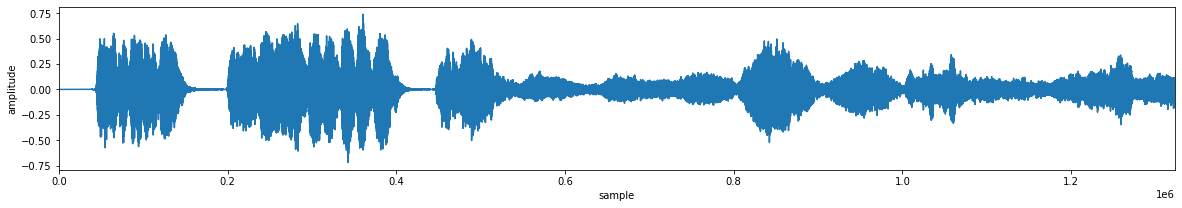

In [18]:
#We can plot the amplitude for the time series for ID 2494. For normalization, multiply with fs
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(3)
plt.plot(X[0:30*fs])
fig.axes[0].set_xlim([0,30*fs])
fig.axes[0].set_xlabel('sample')
fig.axes[0].set_ylabel('amplitude')

In [3]:
pip install sounddevice

Note: you may need to restart the kernel to use updated packages.


We can play a sample

In [19]:
sd.play(X[0:30*fs], fs)

NameError: name 'sd' is not defined